In [1]:
import sys
import os

# 현재 작업 디렉토리 확인
print("현재 작업 디렉토리:", os.getcwd())

# 상위 폴더로 이동
os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))

# 변경된 작업 디렉토리 확인

print("변경된 작업 디렉토리:", os.getcwd())

현재 작업 디렉토리: /content/new_neo_project1/notebooks
변경된 작업 디렉토리: /content/new_neo_project1


In [2]:
# 경로 설정 - ipynb 파일이 있는 디렉토리를 기본 경로로 설정
base_dir = os.path.dirname(os.path.abspath("./"))  # 현재 파일의 절대 경로 기준
sys.path.append(base_dir)  # 기본 경로 추가

print("기본 경로 추가 완료:", base_dir)
print("sys.path:", sys.path)

기본 경로 추가 완료: /content
sys.path: ['/content/new_neo_project1/notebooks', '/usr/lib/python311.zip', '/usr/lib/python3.11', '/usr/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.11/dist-packages/IPython/extensions', '/root/.ipython', '/content']


In [3]:
from src.data_utils.data_loader import get_category_mapping

train_path = os.path.join('./data', 'train_images')
ann_path = os.path.join('./data', 'train_annots_modify')

name_to_idx, idx_to_name = get_category_mapping(ann_path, False)

cpu


In [4]:
import torchvision.transforms.v2 as T
import torch

transforms = T.Compose([
    T.ToImage(),
    T.RandomRotation(degrees=(-30, 30)),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.5),
    T.ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(-0.1, 0.1)),
    T.RandomGrayscale(p=0.1),
    T.RandomPerspective(distortion_scale=0.2, p=0.5),
    T.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0)),
    T.RandomResizedCrop(size=(512, 512), scale=(0.8, 1.2)),
    T.ToDtype(dtype=torch.float32, scale=True)
])

transforms

Compose(
      ToImage()
      RandomRotation(degrees=[-30.0, 30.0], interpolation=InterpolationMode.NEAREST, expand=False, fill=0)
      RandomHorizontalFlip(p=0.5)
      RandomVerticalFlip(p=0.5)
      ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(-0.1, 0.1))
      RandomGrayscale(p=0.1)
      RandomPerspective(p=0.5, distortion_scale=0.2, interpolation=InterpolationMode.BILINEAR, fill=0)
      GaussianBlur(kernel_size=(3, 3), sigma=[0.1, 2.0])
      RandomResizedCrop(size=(512, 512), scale=(0.8, 1.2), ratio=(0.75, 1.3333333333333333), interpolation=InterpolationMode.BILINEAR, antialias=True)
      ToDtype(scale=True)
)

In [5]:
from src.data_utils.data_loader import  PillDataset

train_dataset = PillDataset(image_dir=train_path, ann_dir=ann_path, mode='train', category_mapping=name_to_idx, transform=transforms, debug=False)

Colab 환경에서 실행 중입니다.
Index:  100
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[199.0334, 321.2043, 289.3117, 392.8637],
               [299.1913,  71.5309, 410.5307, 217.4159],
               [ 82.1934,  91.2989, 212.9273, 217.8753]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([43, 51, 59]), 'image_id': tensor(1044), 'area': tensor([33670., 97232., 95121.]), 'is_crowd': tensor([0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([199.0334, 321.2043, 289.3117, 392.8637])
Box:  tensor([299.1913,  71.5309, 410.5307, 217.4159])
Box:  tensor([ 82.1934,  91.2989, 212.9273, 217.8753])


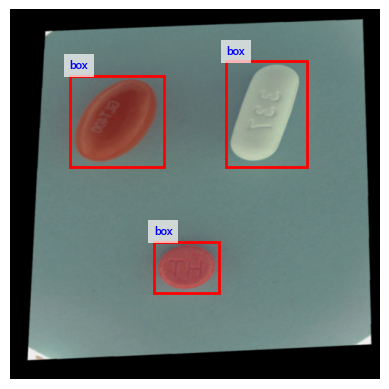

Index:  200
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[ 35.5057, 363.5738, 169.1211, 459.8120],
               [318.1812, 348.3080, 425.2129, 417.5040],
               [ 34.1820,  87.4173, 235.5558, 175.5001],
               [335.6686,  71.1943, 440.9987, 193.6468]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([ 1, 36, 28,  8]), 'image_id': tensor(582), 'area': tensor([54934., 31590., 74227., 55464.]), 'is_crowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([ 35.5057, 363.5738, 169.1211, 459.8120])
Box:  tensor([318.1812, 348.3080, 425.2129, 417.5040])
Box:  tensor([ 34.1820,  87.4173, 235.5558, 175.5001])
Box:  tensor([335.6686,  71.1943, 440.9987, 193.6468])


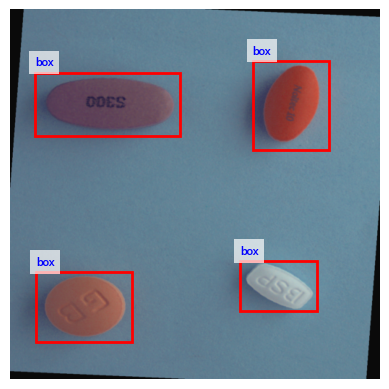

Index:  300
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[253.3421, 253.8012, 458.1188, 378.9351],
               [210.7764,  72.6610, 304.1826, 139.6926],
               [ 51.9339, 299.3239, 173.2164, 384.4163]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([51, 74,  9]), 'image_id': tensor(642), 'area': tensor([136485.,  33304.,  52200.]), 'is_crowd': tensor([0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([253.3421, 253.8012, 458.1188, 378.9351])
Box:  tensor([210.7764,  72.6610, 304.1826, 139.6926])
Box:  tensor([ 51.9339, 299.3239, 173.2164, 384.4163])


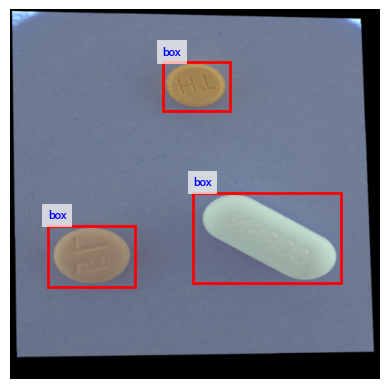

Index:  400
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[273.3957, 303.6426, 470.4287, 512.0000],
               [365.4509,  78.7154, 512.0000, 274.0275],
               [  0.0000, 215.3278, 243.2459, 440.1033],
               [107.1886,  47.3196, 284.5013, 183.3289]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([27, 33, 10, 18]), 'image_id': tensor(566), 'area': tensor([121187.,  95667., 195800.,  72628.]), 'is_crowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([273.3957, 303.6426, 470.4287, 512.0000])
Box:  tensor([365.4509,  78.7154, 512.0000, 274.0275])
Box:  tensor([  0.0000, 215.3278, 243.2459, 440.1033])
Box:  tensor([107.1886,  47.3196, 284.5013, 183.3289])


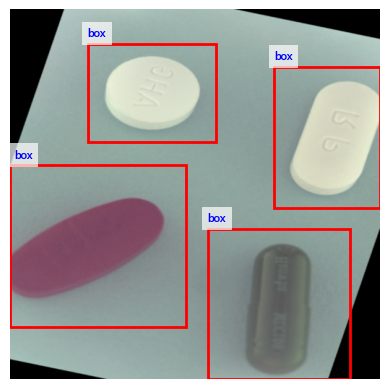

Index:  500
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[ 27.1472, 206.6438, 236.0324, 480.1890],
               [222.5478, 101.5708, 329.9156, 186.3701],
               [263.3053, 327.3012, 433.0602, 455.8989]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([51, 49, 61]), 'image_id': tensor(1422), 'area': tensor([174632.,  33670.,  83790.]), 'is_crowd': tensor([0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([ 27.1472, 206.6438, 236.0324, 480.1890])
Box:  tensor([222.5478, 101.5708, 329.9156, 186.3701])
Box:  tensor([263.3053, 327.3012, 433.0602, 455.8989])


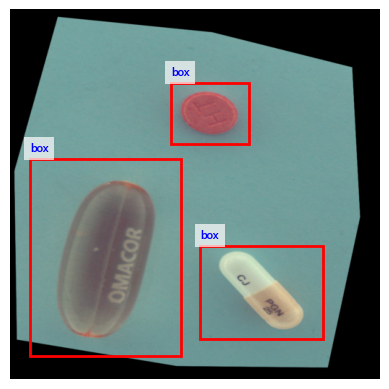

Index:  600
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[ 58.3022, 273.6974, 185.6000, 470.1709],
               [285.2879, 247.5859, 465.9353, 454.4406],
               [ 45.9637,  16.8263, 185.1672, 232.5201],
               [300.3339,  45.7608, 458.0217, 167.0356]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([27, 71, 33, 37]), 'image_id': tensor(1398), 'area': tensor([105750., 159239., 126936.,  81795.]), 'is_crowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([ 58.3022, 273.6974, 185.6000, 470.1709])
Box:  tensor([285.2879, 247.5859, 465.9353, 454.4406])
Box:  tensor([ 45.9637,  16.8263, 185.1672, 232.5201])
Box:  tensor([300.3339,  45.7608, 458.0217, 167.0356])


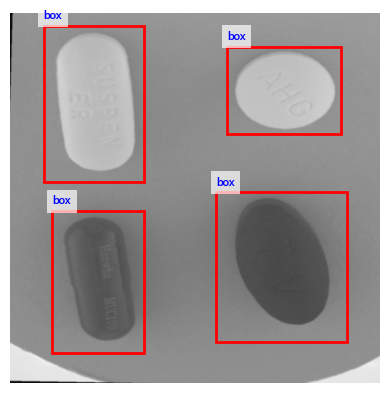

Index:  700
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[ 81.3218, 269.6852, 191.8680, 453.6474],
               [103.0374,  39.0063, 230.8741, 220.6216],
               [273.7140,  64.5721, 444.1248, 200.9161],
               [270.2671, 254.3701, 431.2933, 443.8748]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([27, 68, 44, 25]), 'image_id': tensor(304), 'area': tensor([ 93795., 108811., 112216., 147136.]), 'is_crowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([ 81.3218, 269.6852, 191.8680, 453.6474])
Box:  tensor([103.0374,  39.0063, 230.8741, 220.6216])
Box:  tensor([273.7140,  64.5721, 444.1248, 200.9161])
Box:  tensor([270.2671, 254.3701, 431.2933, 443.8748])


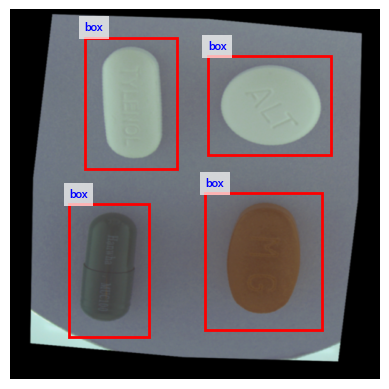

Index:  800
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[320.1373, 103.4552, 415.4315, 184.9977],
               [ 69.6419,  99.5701, 211.4847, 191.5083],
               [350.0204, 348.4111, 461.0072, 429.5635],
               [ 74.7252, 295.7249, 197.8418, 460.6471]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([ 4, 43, 60, 54]), 'image_id': tensor(1470), 'area': tensor([34650., 58123., 40180., 89505.]), 'is_crowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([320.1373, 103.4552, 415.4315, 184.9977])
Box:  tensor([ 69.6419,  99.5701, 211.4847, 191.5083])
Box:  tensor([350.0204, 348.4111, 461.0072, 429.5635])
Box:  tensor([ 74.7252, 295.7249, 197.8418, 460.6471])


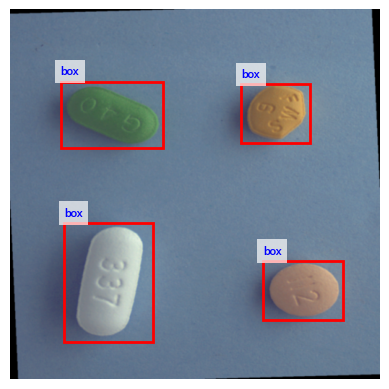

Index:  900
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[ 40.7080,  85.2245, 228.9175, 208.1869],
               [  0.0000, 294.4505, 224.5626, 497.5600],
               [332.2309, 132.5623, 463.0629, 253.6320],
               [285.2742, 371.7365, 424.9530, 482.3235]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([ 4, 69, 20, 48]), 'image_id': tensor(1253), 'area': tensor([ 78568., 173031.,  54016.,  52896.]), 'is_crowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([ 40.7080,  85.2245, 228.9175, 208.1869])
Box:  tensor([  0.0000, 294.4505, 224.5626, 497.5600])
Box:  tensor([332.2309, 132.5623, 463.0629, 253.6320])
Box:  tensor([285.2742, 371.7365, 424.9530, 482.3235])


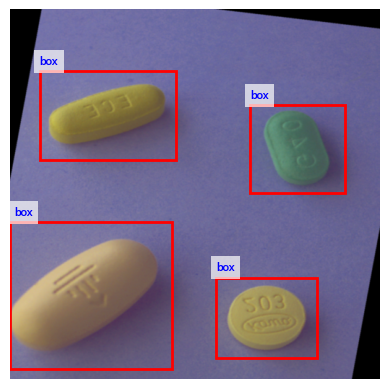

Index:  1000
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[ 93.4583, 110.4625, 227.5530, 193.4331],
               [323.6625, 334.8797, 421.2454, 430.0033],
               [103.1750, 355.8870, 213.3491, 462.3490],
               [342.5493,  86.5946, 441.1068, 173.8591]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([ 4, 34, 70, 74]), 'image_id': tensor(463), 'area': tensor([48024., 48160., 52899., 44178.]), 'is_crowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([ 93.4583, 110.4625, 227.5530, 193.4331])
Box:  tensor([323.6625, 334.8797, 421.2454, 430.0033])
Box:  tensor([103.1750, 355.8870, 213.3491, 462.3490])
Box:  tensor([342.5493,  86.5946, 441.1068, 173.8591])


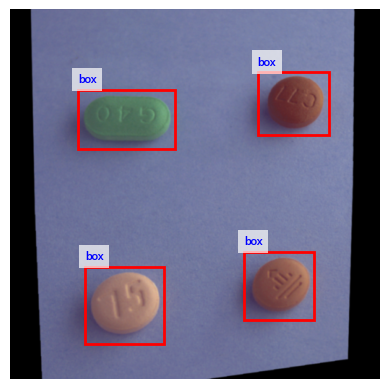

Index:  1100
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[329.4668,  81.8965, 471.5833, 187.9913],
               [ 54.7795,  65.4016, 179.4842, 159.6591],
               [ 42.7275, 336.0319, 149.5885, 419.7218],
               [310.7566, 334.6778, 445.6832, 436.0243]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([ 1, 26, 38, 73]), 'image_id': tensor(993), 'area': tensor([53110., 41406., 31504., 48168.]), 'is_crowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([329.4668,  81.8965, 471.5833, 187.9913])
Box:  tensor([ 54.7795,  65.4016, 179.4842, 159.6591])
Box:  tensor([ 42.7275, 336.0319, 149.5885, 419.7218])
Box:  tensor([310.7566, 334.6778, 445.6832, 436.0243])


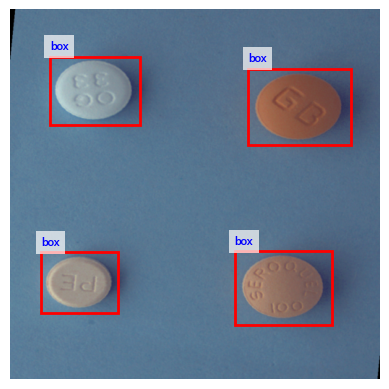

Index:  1200
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[110.6468,  56.9104, 287.0020, 164.9519],
               [213.4473, 366.1066, 359.6976, 474.0030],
               [  0.0000, 285.9420, 133.5849, 402.1589],
               [381.6084, 130.5553, 512.0000, 242.7929]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([ 4, 34, 70, 74]), 'image_id': tensor(465), 'area': tensor([47685., 42200., 48816., 46144.]), 'is_crowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([110.6468,  56.9104, 287.0020, 164.9519])
Box:  tensor([213.4473, 366.1066, 359.6976, 474.0030])
Box:  tensor([  0.0000, 285.9420, 133.5849, 402.1589])
Box:  tensor([381.6084, 130.5553, 512.0000, 242.7929])


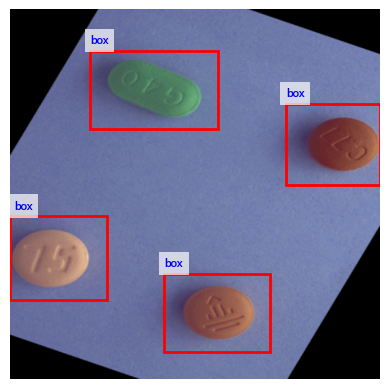

Index:  1300
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[ 34.6371, 136.9695, 183.1418, 252.9301],
               [359.1180, 300.1551, 470.8795, 408.5484],
               [ 76.3326, 294.2809, 351.1935, 512.0000],
               [239.4789,  64.3041, 368.7324, 170.1767]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([26, 11, 47, 29]), 'image_id': tensor(432), 'area': tensor([ 46010.,  34400., 152872.,  44521.]), 'is_crowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([ 34.6371, 136.9695, 183.1418, 252.9301])
Box:  tensor([359.1180, 300.1551, 470.8795, 408.5484])
Box:  tensor([ 76.3326, 294.2809, 351.1935, 512.0000])
Box:  tensor([239.4789,  64.3041, 368.7324, 170.1767])


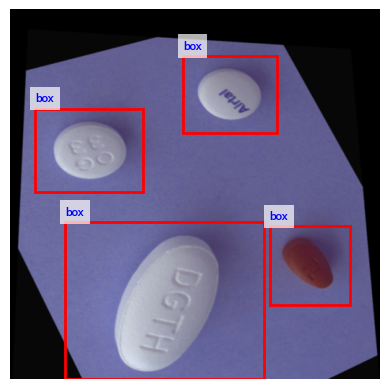

Index:  1400
img:  torch.Size([3, 512, 512])
target:  {'boxes': BoundingBoxes([[135.6143, 291.5564, 363.2705, 500.6028],
               [ 99.8679,  26.1613, 314.2761, 188.7220],
               [288.6368,  81.4286, 480.1484, 281.0354],
               [  0.0000, 183.1426, 194.7587, 411.8610]], format=BoundingBoxFormat.XYXY, canvas_size=(512, 512)), 'labels': tensor([27, 44, 10, 18]), 'image_id': tensor(568), 'area': tensor([117369., 103360., 106672., 160062.]), 'is_crowd': tensor([0, 0, 0, 0]), 'orig_size': tensor([1280,  976])}
Box:  tensor([135.6143, 291.5564, 363.2705, 500.6028])
Box:  tensor([ 99.8679,  26.1613, 314.2761, 188.7220])
Box:  tensor([288.6368,  81.4286, 480.1484, 281.0354])
Box:  tensor([  0.0000, 183.1426, 194.7587, 411.8610])


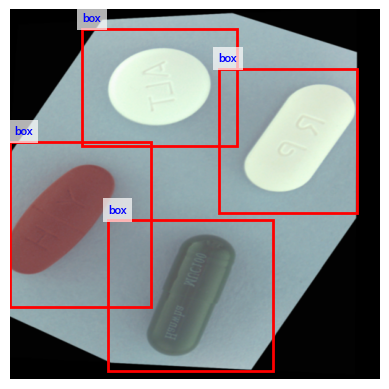

In [6]:
import matplotlib.pyplot as plt
from src.utils import draw_bbox

for i in range(len(train_dataset)):
    if i % 100 == 0 and i > 0:
        print("Index: ", i)
        fig, ax = plt.subplots(1, 1)
        img, targets = train_dataset[i]
        print("img: ", img.shape)
        plt.imshow(img.permute(1,2,0).cpu())
        print("target: ", targets)
        for box in targets['boxes']:
            print("Box: ", box)
            draw_bbox(ax, box.tolist(), 'box', 'red')
        plt.axis('off')
        plt.show()

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
from src.test_frcnn import test

results = test('./data/test_images', device, 'model_31.pth', 4, 0, False)

Testing:   0%|          | 0/211 [00:37<?, ?it/s]


In [9]:
results

[{'image_id': '1',
  'boxes': ([103.10833740234375,
    125.06166076660156,
    233.44200134277344,
    192.46449279785156],
   [369.7369079589844, 38.37233352661133, 623.4493408203125, 236.966796875],
   [118.2237319946289,
    369.1080322265625,
    230.64659118652344,
    519.8619384765625],
   [359.241455078125,
    21.821863174438477,
    631.3184204101562,
    245.6433563232422],
   [405.6718444824219,
    332.4604187011719,
    558.6483154296875,
    581.8323364257812],
   [388.33624267578125,
    315.1578063964844,
    558.0512084960938,
    583.7600708007812],
   [121.98506927490234,
    378.3691101074219,
    224.90029907226562,
    508.4320983886719],
   [350.0088806152344, 29.078210830688477, 629.7875366210938, 247.1708984375],
   [112.77973937988281,
    369.80889892578125,
    224.88462829589844,
    515.6736450195312],
   [393.476806640625,
    339.71246337890625,
    566.7425537109375,
    574.7731323242188],
   [390.9617004394531, 333.4851989746094, 553.66357421875, 57

In [10]:
from src.utils import visualization

visualization(results, debug=False)

전체 4개의 이미지, 1 페이지로 분할 저장합니다.
[페이지 1 / 1] | 0 - 4번째 이미지 표시
페이지 당 1 행, 4 열 형태의 이미지 플롯
페이지 1 이미지가 저장되었습니다: ./data/results/frcnn/page_1_1_4.png
총 1페이지 저장 완료!


In [20]:
from src.make_csv import submission_csv

In [21]:
submission_csv(results, './notebooks', YOLO=False, debug=False)

TypeError: cannot unpack non-iterable int object

In [19]:
len(results)

4